## **WQD 7005 Data Mining Group Project**

**Proejct Tittle: Housing Loan Prediction Model For Married Couples**

Group Member:
1.   NUR SHAFIQAH BINTI MOHAMAD JOHARI (22119564​)
2.   LAW JIA JIN (22071390)
3.   LIM SZE SING (22109557)
4.   GAN JING WEN (22065433)


Methodology: SEMMA

Objection:
1. To identify the factors that will affects the housing loan approval for married couples

2. To develop a prediction model for housing loan of this population

3. To evaluate the performance of the model

# **1. Sample** #

Data source: https://github.com/naveen-chauhan/Loan-Prediction-Classification/tree/master/Dataset

In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Modelling
from sklearn.model_selection import train_test_split

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential  #AAN
from tensorflow.keras.layers import Dense       #AAN

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [ ]:
train_df= pd.read_csv('/content/train.csv',sep=",")
test_df= pd.read_csv('/content/train.csv',sep=",")


In [ ]:
#from IPython.display import display
#train_df = train_df.head().style.set_table_styles([{'selector': 'th', 'props': [('max-width', '100px')]}])
#display(train_df)
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Summry of df1
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Count the number of rows in df1
row_count = train_df.shape[0]
print("Number of rows:", row_count)

Number of rows: 614


In [ ]:
# Filter DataFrame, Married= Yes
#df = df[df1['Married'] == 'Yes']
train_df = train_df[train_df['Married'] == 'Yes']

#df_head = df.head().style.set_table_styles([{'selector': 'th', 'props': [('max-width', '100px')]}])
#display(df_head)
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# Count the number of rows in df
row_count = train_df.shape[0]
print("Number of rows:", row_count)

Number of rows: 398


# **2. Explore**

## **2.1 Exploring Data Distribution**



In [ ]:
#Get general insights of data set

# Get the number of rows and columns
num_rows, num_columns = train_df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
train_df.info()
train_df.head(10)

Number of rows: 398
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 1 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            398 non-null    object 
 1   Gender             388 non-null    object 
 2   Married            398 non-null    object 
 3   Dependents         390 non-null    object 
 4   Education          398 non-null    object 
 5   Self_Employed      380 non-null    object 
 6   ApplicantIncome    398 non-null    int64  
 7   CoapplicantIncome  398 non-null    float64
 8   LoanAmount         384 non-null    float64
 9   Loan_Amount_Term   389 non-null    float64
 10  Credit_History     362 non-null    float64
 11  Property_Area      398 non-null    object 
 12  Loan_Status        398 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y


From here we can conclude that

*   There are 398 rows and 13 columns available in the dataset
*   Combination of categorical and numerical values are available



## **2.2 Univariate Analysis - Numerical Variables**

In [ ]:
#Descriptive statistics insights, get the central tendencies
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,398.000000,398.000000,384.000000,389.000000,362.000000
mean,5629.173367,1794.632965,155.750000,336.987147,0.842541
std,6989.254425,2039.962354,89.934267,66.739163,0.364737
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2817.500000,0.000000,108.000000,360.000000,1.000000
50%,3854.500000,1625.000000,132.000000,360.000000,1.000000
75%,5820.500000,2464.000000,178.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


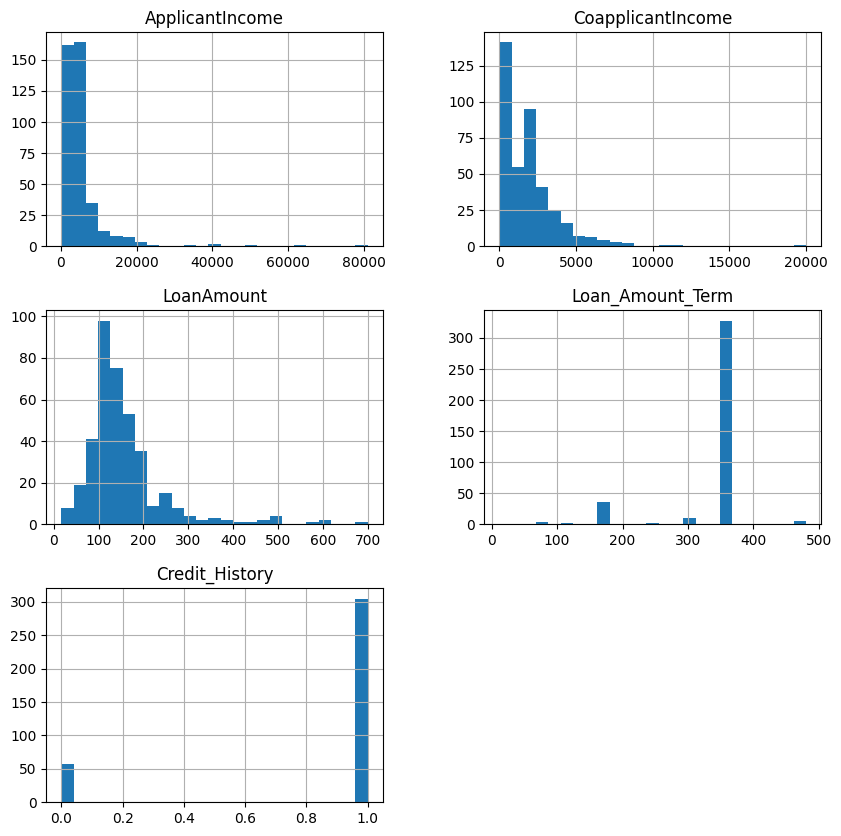

In [ ]:
#Visualize statistics to histogram
train_df.hist(bins = 25,figsize=(10,10));

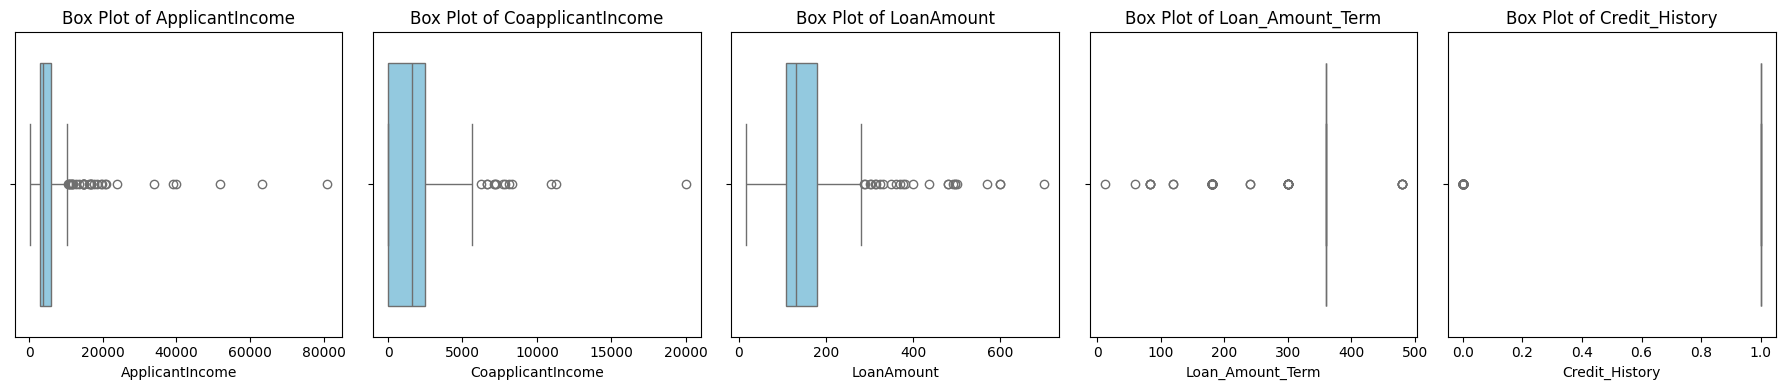

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Creating subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 4))

# Plotting box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train_df[column], ax=axes[i], color='skyblue')
    axes[i].set_xlabel(column)
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()



From here we can conclude that

*   There are 5 columns identified with numerical values
*   ApplicantIncome, CoapplicantIncome and LoanAmount values are heavily skewed and have a lot of outliers. Data modification is needed to reduce biasness and skewness
* Loan_Amount_Term are spread out widely with no significant clustering suggesting that there is significant noise or randomness present in the data
* Credit_History has only 2 values which indicates a binary valued data. This type of data can simplify the model's prediction especially for regression but will need to handle class imbalances

## **2.3 Univariate Analysis - Categorical Variables**

Since we have already identified the numerical values, we can assume the rest of the columns are categorical valued columns.

In [ ]:
# Select columns containing categorical data
categorical_columns = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Print unique values in each categorical column
for column in categorical_columns:
    unique_values = train_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

# Count the frequency of each category in categorical columns
for column in categorical_columns:
    category_counts = train_df[column].value_counts()
    print(f"\nValue counts for '{column}':\n{category_counts}")


Unique values in 'Gender': ['Male' nan 'Female']
Unique values in 'Dependents': ['1' '0' '2' '3+' nan]
Unique values in 'Education': ['Graduate' 'Not Graduate']
Unique values in 'Self_Employed': ['No' 'Yes' nan]
Unique values in 'Property_Area': ['Rural' 'Urban' 'Semiurban']
Unique values in 'Loan_Status': ['N' 'Y']

Value counts for 'Gender':
Gender
Male      357
Female     31
Name: count, dtype: int64

Value counts for 'Dependents':
Dependents
0     174
2      93
1      79
3+     44
Name: count, dtype: int64

Value counts for 'Education':
Education
Graduate        309
Not Graduate     89
Name: count, dtype: int64

Value counts for 'Self_Employed':
Self_Employed
No     326
Yes     54
Name: count, dtype: int64

Value counts for 'Property_Area':
Property_Area
Semiurban    151
Urban        131
Rural        116
Name: count, dtype: int64

Value counts for 'Loan_Status':
Loan_Status
Y    285
N    113
Name: count, dtype: int64


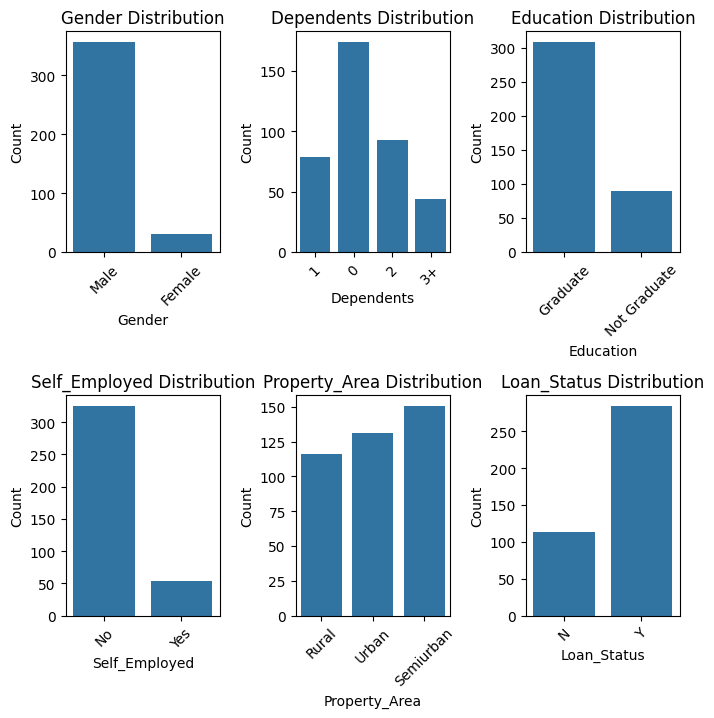

In [ ]:
#Visualize categorical data

# Set up the matplotlib figure
plt.figure(figsize=(7, 10))

# Plot each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train_df, x=column)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


From here we can conclude that

* Most categorical columns, other than Property_Area, seemed to have binary values where we can change it to numerical to standardize with other columns and studies can be easily done
* Loan_Status can be identified as the target variable in this study
* Since we are narrowing down our study case to married people & systematic sampling has been done, Married column can be removed altogether for the study
* Data distribution for Gender and Self_Employed are quite imbalanced. It is important to take consideration of potential biasness througout the study.

## **2.3 Bivariate Analysis**

In order for us to do Bivariate or Multivariate analysis, its better to have all categorical variables be encoded to numerical ones. Since we do have a variable that has more than 2 unique instances, we will proceed with label encoding.

Also, it was also identified that Married column is no longer needed for the study hence we will drop it.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame
encoded_df = train_df.copy()

# Drop the 'Married' column
encoded_df.drop(['Married', 'Loan_ID'], axis=1, inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over all remaining columns
for col in encoded_df.columns:
    # Check if the column is of object type (categorical)
    if encoded_df[col].dtype == 'object':
        # Encode categorical columns
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

print(encoded_df.head())


   Gender  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1           1          0              0             4583   
2       1           0          0              1             3000   
3       1           0          1              0             2583   
5       1           2          0              1             5417   
6       1           0          1              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   
6             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
5              2            1  
6         

Using Scatter Plot to investigate the relation between target variable and all variables :

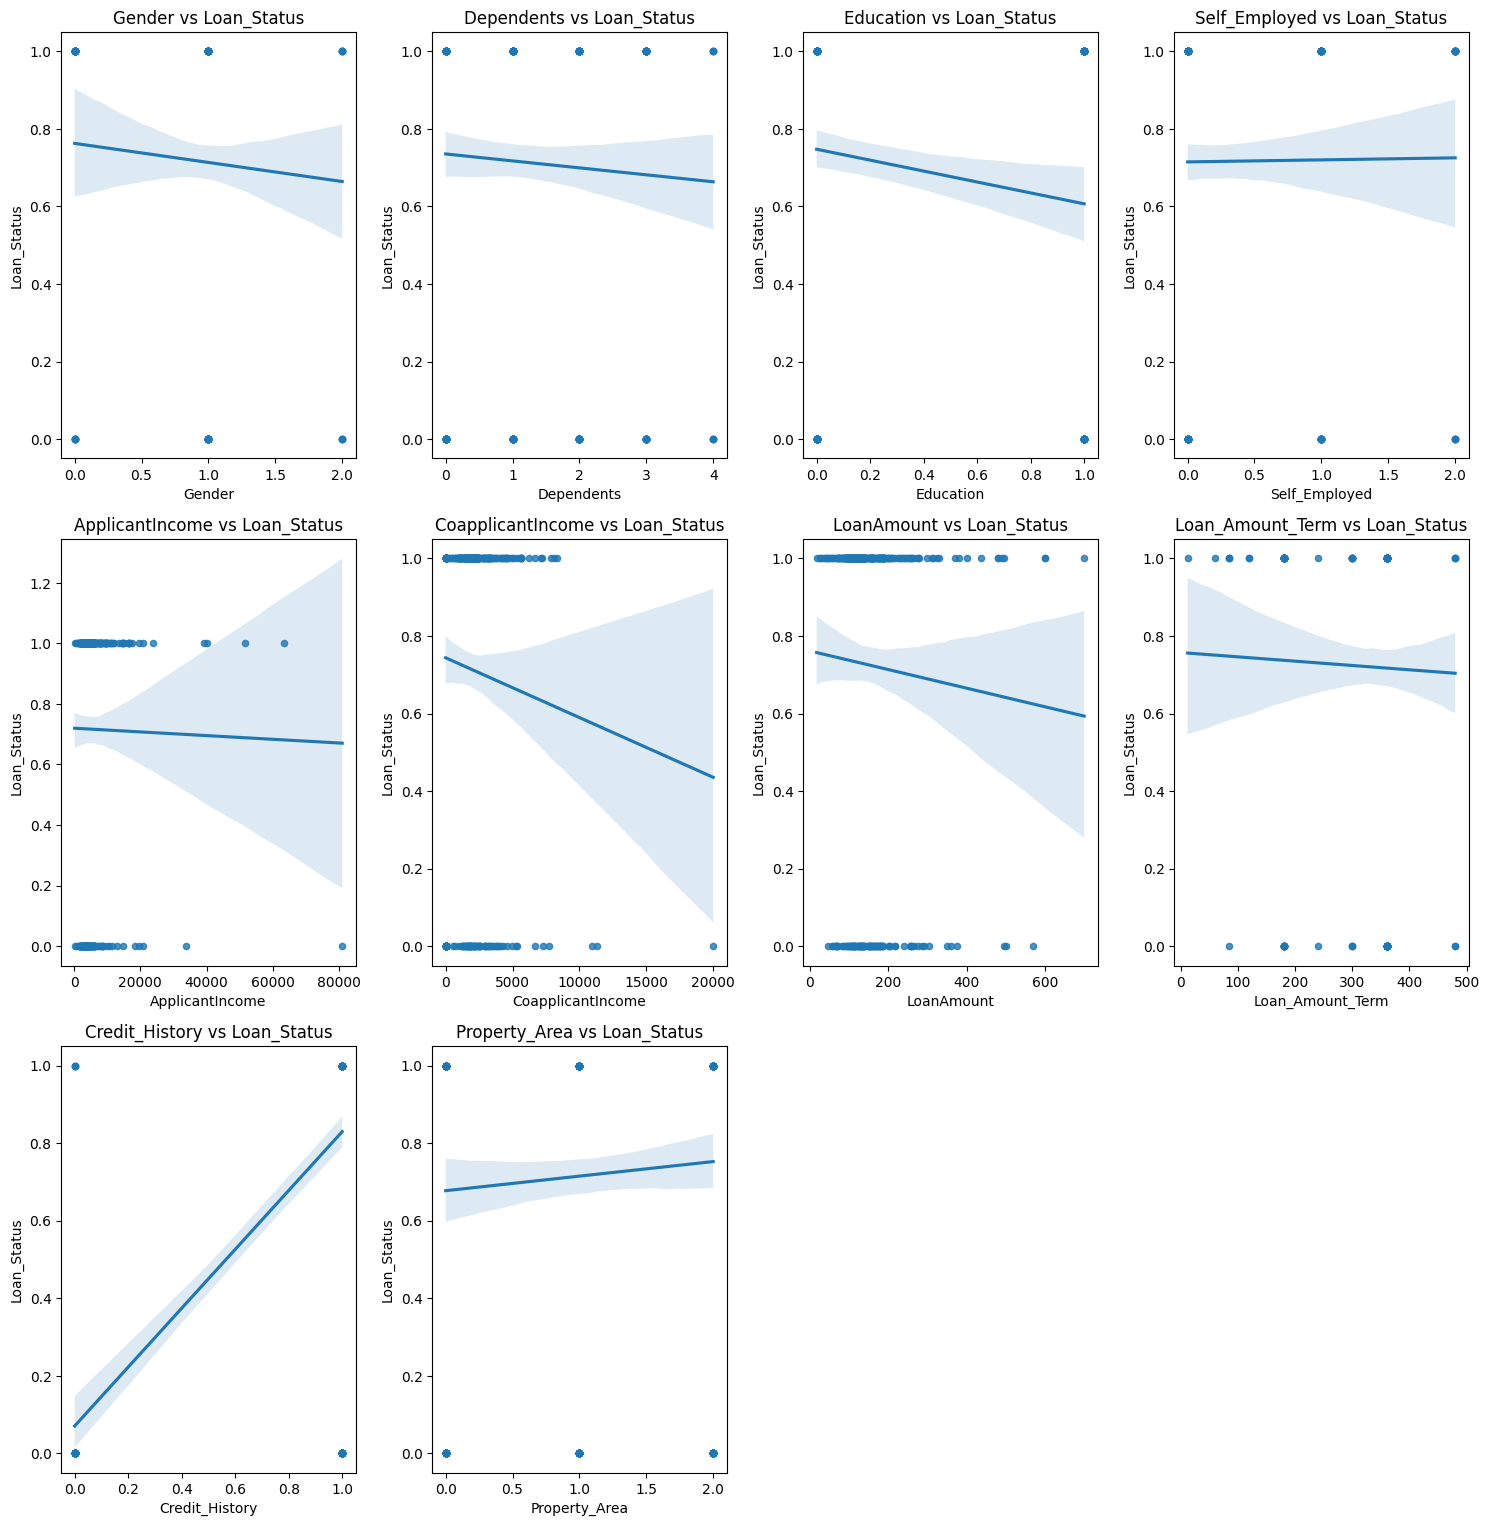

In [ ]:
# Define your target variable
target_variable = 'Loan_Status'

# Get list of all variables (including target variable)
all_variables = encoded_df.columns

# Remove the target variable from the list of other variables
other_variables = [col for col in all_variables if col != target_variable]

# Determine the number of rows and columns for subplots
num_rows = len(other_variables) // 3 + (len(other_variables) % 3 > 0)
num_cols = min(len(other_variables), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Plot scatter plots with trendline for each variable with respect to the target variable
for i, variable in enumerate(other_variables):
    row = i // num_cols
    col = i % num_cols

    # Plot scatter plot with trendline
    sns.regplot(x=variable, y=target_variable, data=encoded_df, ax=axes[row, col], scatter_kws={'s': 20})
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel(target_variable)
    axes[row, col].set_title(f'{variable} vs {target_variable}')

# Remove any empty subplots
for i in range(len(other_variables), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


From here we can conclude that

* Loan_ID is not necessary to the study since all inputs are unique
* Not all variables have exponential value to the target variable and outliers are prominent
* Data cleaning is crucial in order to get a more precise plotting

## **2.5 Multivariate Analysis**

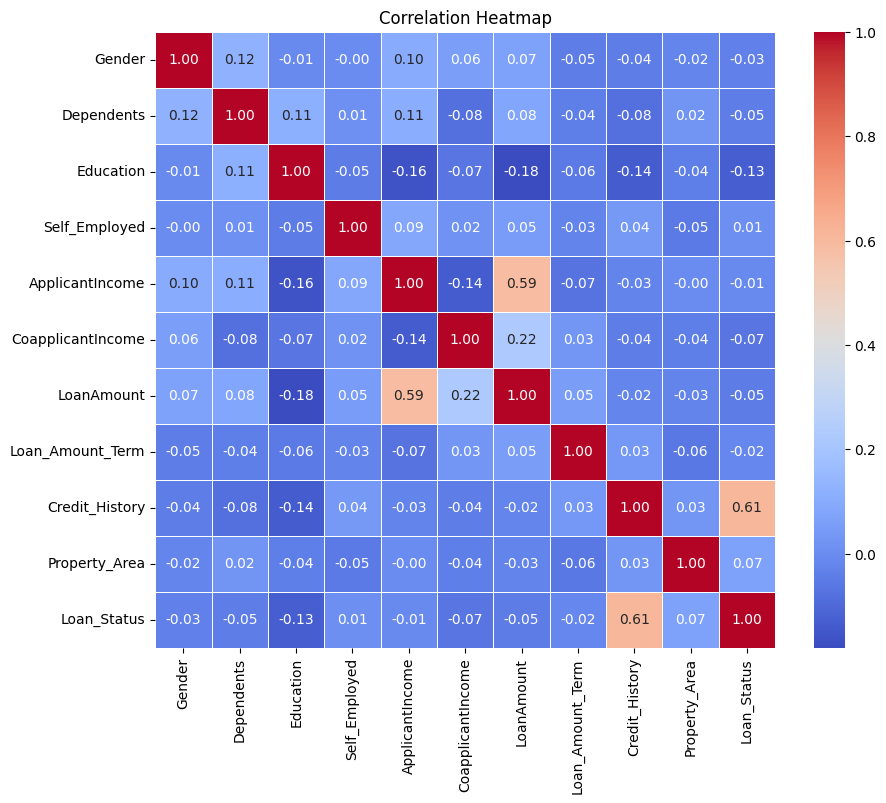

In [ ]:
# Calculate correlation
correlation = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From here we can conclude that

* Credit History has a high correlation to Loan_Status
* Property_Area, Loan_Amount_Term and Self_Employed have correlation to Loan_Status but rather low
* Other variables have no correlation to Loan_Status, however this might change once we clean the data

## **2.6 Data Quality**

From here we will have a check on the overall quality of the data. This process will be done as below :


*   Examine missing values
*   Examine duplicated rows


In [ ]:
#Examine missing values
encoded_df.isnull().sum()

Gender                0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           14
Loan_Amount_Term      9
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
encoded_df.duplicated().sum()

0

## **2.7 Conclusion**



1.   Dataset consist of both numerical and categorical values, encoding data is a crucial step for us to proceed with modeling step
2. Targeted variable can be identified as Loan_Status for the study, while other potential variables can be further identified after data modification
3. As for current stage, it seems like Credit History, Property_Area, Loan_Amount_Term and Self_Employed have correlation to Loan_Status however further checking is necessary after data modification
4. Dataset overall is heavily skewed, prominent outliers, and contains missing values. Necessary data modification is needed to ensure study will go smooth



# **3. Modify**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 1 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            398 non-null    object 
 1   Gender             388 non-null    object 
 2   Married            398 non-null    object 
 3   Dependents         390 non-null    object 
 4   Education          398 non-null    object 
 5   Self_Employed      380 non-null    object 
 6   ApplicantIncome    398 non-null    int64  
 7   CoapplicantIncome  398 non-null    float64
 8   LoanAmount         384 non-null    float64
 9   Loan_Amount_Term   389 non-null    float64
 10  Credit_History     362 non-null    float64
 11  Property_Area      398 non-null    object 
 12  Loan_Status        398 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.5+ KB


In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,398.0,5629.173367,6989.254425,150.0,2817.5,3854.5,5820.5,81000.0
CoapplicantIncome,398.0,1794.632965,2039.962354,0.0,0.0,1625.0,2464.0,20000.0
LoanAmount,384.0,155.750000,89.934267,17.0,108.0,132.0,178.5,700.0
Loan_Amount_Term,389.0,336.987147,66.739163,12.0,360.0,360.0,360.0,480.0
Credit_History,362.0,0.842541,0.364737,0.0,1.0,1.0,1.0,1.0


From here we can see that ApplicantIncome & CoapplicantIncome std is higher than mean which is abnormal. This indicate the dataset might be heavily skewed or have outlier.

Other than that, the minimum loan amount is 17, which is far from the mean. This need to check further on the loan amount term, if says the loan amount is 17 but the loan amount term is 360, meaning the installment amount for one team is 0.047 which is too little. If this is the case, this row of data we shall consider as error data.

Furthermore, the minimum Loan_Amount_Term is only 12 which is far from the mean. This could also be another error data.

## 3.1 Dropping unnecessary columns

First, we will drop Loan_ID from the train set and test, because it does not contribute to a loan approval status.

In [ ]:
#Drop feature Loan_ID
train_df = train_df.drop(['Loan_ID'], axis=1)
test_df = test_df.drop(['Loan_ID'], axis=1)

Next, we will drop Married feature from the train and test set since we already did systematic sampling to include only married data.  

In [ ]:
#Drop feature Married
train_df = train_df.drop(['Married'], axis=1)
test_df = test_df.drop(['Married'], axis=1)

##3.2 Handle missing data






In [ ]:
#Check the missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(7)

,Total,%
Credit_History,36,9.0
Self_Employed,18,4.5
LoanAmount,14,3.5
Gender,10,2.5
Loan_Amount_Term,9,2.3
Dependents,8,2.0
Education,0,0.0


To handle the missing data:


*   Loan_Amount_Term and Dependents - fill with mode
*   LoanAmount - fill with mean
*   Self_Employed, Credit_History, Gender - fill with random number.

In [ ]:
#Fill missing data with mode
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
#Fill missing data with mode
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)

In [ ]:
#Fill missing data with mean
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

In [ ]:
# Function to fill missing data with random number
def fill_missing_with_random(df, column):
    existing_values = df[column].dropna().unique()
    df[column] = df[column].apply(lambda x: np.random.choice(existing_values) if pd.isnull(x) else x)

In [ ]:
#Fill missing data with random number
fill_missing_with_random(train_df, 'Self_Employed')
fill_missing_with_random(test_df, 'Self_Employed')

In [ ]:
#Fill missing data with random number
fill_missing_with_random(train_df, 'Credit_History')
fill_missing_with_random(test_df, 'Credit_History')

In [ ]:
#change the data type to integer
train_df['Credit_History'] = train_df['Credit_History'].astype(int)
test_df['Credit_History'] = test_df['Credit_History'].astype(int)

In [ ]:
#Fill missing data with random number
fill_missing_with_random(train_df, 'Gender')
fill_missing_with_random(test_df, 'Gender')

## 3.3 Transform Categorical Data

Next, we will convert 'Gender', 'Dependents','Education','Self-Employed','Property_Area','Loan_Status' feature from categorical into numeric.

In [ ]:
genders = {"Male": 0, "Female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Gender'] = dataset['Gender'].map(genders)

In [ ]:
dependents = {"0": 0, "1": 1, "2": 2, "3+": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['Dependents'] = dataset['Dependents'].map(dependents)

In [ ]:
educations = {"Not Graduate": 0, "Graduate": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Education'] = dataset['Education'].map(educations)

In [ ]:
self_employeds = {"No": 0, "Yes": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Self_Employed'] = dataset['Self_Employed'].map(self_employeds)

In [ ]:
property_areas = {"Urban": 0, "Semiurban": 1, "Rural":2}
data = [train_df, test_df]

for dataset in data:
    dataset['Property_Area'] = dataset['Property_Area'].map(property_areas)

In [ ]:
loan_status = {"N": 0, "Y": 1}
train_df['Loan_Status'] = train_df['Loan_Status'].map(loan_status)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 1 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             398 non-null    int64  
 1   Dependents         398 non-null    int64  
 2   Education          398 non-null    int64  
 3   Self_Employed      398 non-null    int64  
 4   ApplicantIncome    398 non-null    int64  
 5   CoapplicantIncome  398 non-null    float64
 6   LoanAmount         398 non-null    float64
 7   Loan_Amount_Term   398 non-null    float64
 8   Credit_History     398 non-null    int64  
 9   Property_Area      398 non-null    int64  
 10  Loan_Status        398 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 37.3 KB


In [ ]:
train_df.head(5)

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,4583,1508.0,128.0,360.0,1,2,0
2,0,0,1,1,3000,0.0,66.0,360.0,1,0,1
3,0,0,0,0,2583,2358.0,120.0,360.0,1,0,1
5,0,2,1,1,5417,4196.0,267.0,360.0,1,0,1
6,0,0,0,0,2333,1516.0,95.0,360.0,1,0,1


## 3.4 Column Concatenation

Next, we will add one column named 'TotalIncome'=ApplicantIncome+CoapplicantIncome

TotalIncome we believe will be one of the important feature for the loan approval.

In [ ]:
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

Next, we will also add one column named 'InstallmentAmount'=LoanAmount/Loan_Amount_Term. This is to detect is there any error data where the installment amount doesn't make sense. For now we doesn't take interest into account.

For example, if says the loan amount is 9 but the loan amount term is 360. Meaning the installment for one term is 0.025 which is too little and hence we can conclude this row of data is error data.

In [ ]:
train_df['InstallmentAmount'] = train_df['LoanAmount'] / train_df['Loan_Amount_Term']
test_df['InstallmentAmount'] = test_df['LoanAmount'] / test_df['Loan_Amount_Term']

## 3.5 Handle Outliers

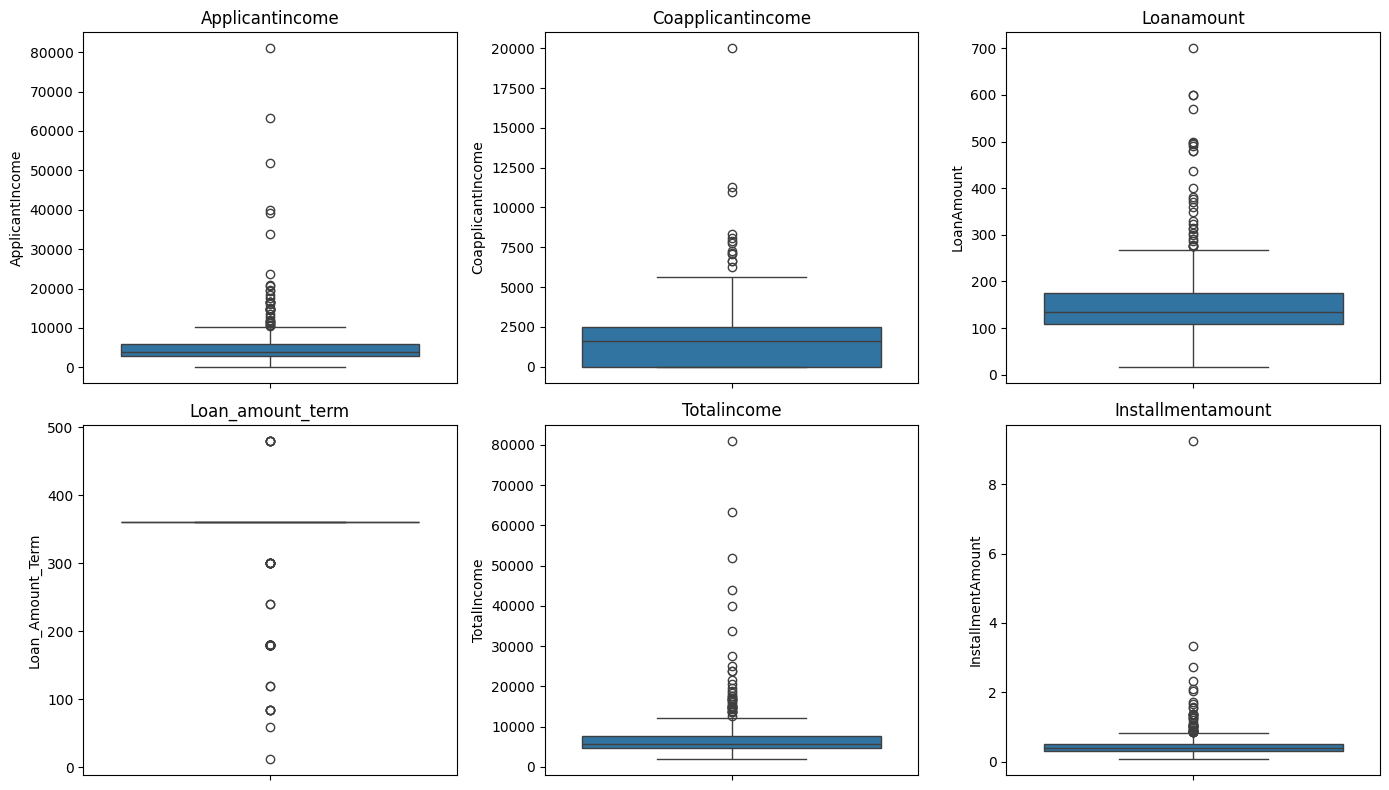

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','TotalIncome', 'InstallmentAmount']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(data=train_df[columns[counter]], ax=axs[i, j])
        axs[i, j].set_title(columns[counter].capitalize())
        counter += 1

plt.tight_layout()
plt.show()

We can see there're outlier for ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, TotalIncome, InstallmentAmount features but these outliers represent natural variations in the population, and they should be left as is in dataset. These are called true outliers. Hence, we will not remove the outliers.

In [ ]:
train_df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,InstallmentAmount
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.085427,0.997487,0.776382,0.158291,5629.173367,1794.632965,155.750000,337.507538,0.819095,0.962312,0.716080,7423.806332,0.512261
std,0.279868,1.065839,0.417193,0.365473,6989.254425,2039.962354,88.334292,66.067203,0.385424,0.787872,0.451466,7009.726324,0.560371
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1880.000000,0.072222
25%,0.000000,0.000000,1.000000,0.000000,2817.500000,0.000000,109.250000,360.000000,1.000000,0.000000,0.000000,4567.000000,0.305556
50%,0.000000,1.000000,1.000000,0.000000,3854.500000,1625.000000,134.500000,360.000000,1.000000,1.000000,1.000000,5696.500000,0.389236
75%,0.000000,2.000000,1.000000,0.000000,5820.500000,2464.000000,175.000000,360.000000,1.000000,2.000000,1.000000,7747.500000,0.519444
max,1.000000,3.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000,9.250000


We can see the InstallmentAmount, the min is 0
072222 and max is 9.25 which is very far from the mean, hence these data are the error data. Let's take a look which row of data have error data.

In [ ]:
# Filter the DataFrame where InstallmentAmount is equal to 9.25
filtered_df = train_df[(train_df['InstallmentAmount'] == 0.072222) | (train_df['InstallmentAmount'] == 9.250000)]

# Display the filtered DataFrame as a table
print("Rows where InstallmentAmount is equal to 0.072222 and 9.250000:")
print(filtered_df)

Rows where InstallmentAmount is equal to 0.072222 and 9.250000:
     Gender  Dependents  Education  Self_Employed  ApplicantIncome  \
497       0           0          1              0             4625   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
497             2857.0       111.0              12.0               0   

     Property_Area  Loan_Status  TotalIncome  InstallmentAmount  
497              0            1       7482.0               9.25  


For Row 497: LoanAmount=111 and Loan_Amount_Term is only 12. --> LoanAmount fall within 25% quartile and 75% quartile but Loan_Amount_Term is abnormal.

We'll remove this row.

In [ ]:
# Remove the rows where InstallmentAmount is equal to 0.025000 or 9.250000 from the original DataFrame
train_df = train_df[(train_df['InstallmentAmount'] != 0.072222) & (train_df['InstallmentAmount'] != 9.250000)]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             397 non-null    int64  
 1   Dependents         397 non-null    int64  
 2   Education          397 non-null    int64  
 3   Self_Employed      397 non-null    int64  
 4   ApplicantIncome    397 non-null    int64  
 5   CoapplicantIncome  397 non-null    float64
 6   LoanAmount         397 non-null    float64
 7   Loan_Amount_Term   397 non-null    float64
 8   Credit_History     397 non-null    int64  
 9   Property_Area      397 non-null    int64  
 10  Loan_Status        397 non-null    int64  
 11  TotalIncome        397 non-null    float64
 12  InstallmentAmount  397 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 43.4 KB


Now the dataset left with 397 entries.

In [ ]:
#Since we have derive TotalIncome and InstallmentAmount, we can drop ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, LoanAmount
train_df = train_df.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','LoanAmount'], axis=1)
test_df = test_df.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','LoanAmount'], axis=1)

Next, we will categorizing TotalIncome into a group. We would need to make sure the group is distributeed evenly, we don't want the 80% of the data falls into one group.

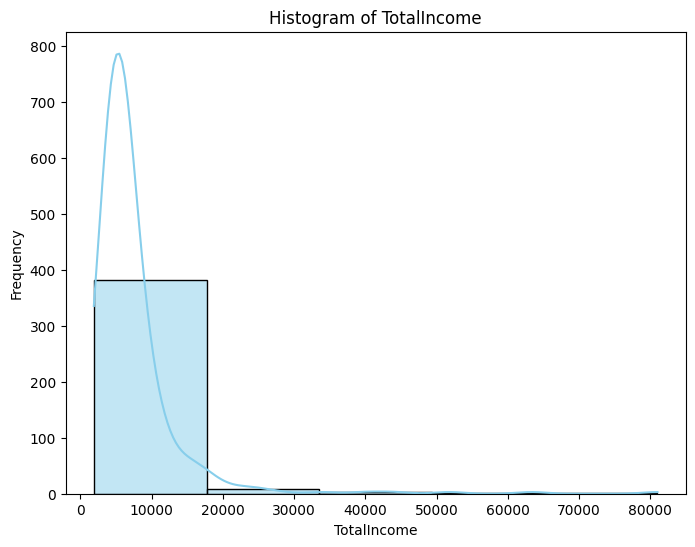

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['TotalIncome'], kde=True, bins=5, color='skyblue')
plt.title('Histogram of TotalIncome')
plt.xlabel('TotalIncome')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['TotalIncome'] < 1000, 'TotalIncome'] = 0
    dataset.loc[(dataset['TotalIncome'] >= 1001) & (dataset['TotalIncome'] <= 2000), 'TotalIncome'] = 1
    dataset.loc[(dataset['TotalIncome'] >= 2001) & (dataset['TotalIncome'] <= 3000), 'TotalIncome'] = 2
    dataset.loc[(dataset['TotalIncome'] >= 3001) & (dataset['TotalIncome'] <= 4000), 'TotalIncome'] = 3
    dataset.loc[(dataset['TotalIncome'] >= 4001) & (dataset['TotalIncome'] <= 5000), 'TotalIncome'] = 4
    dataset.loc[(dataset['TotalIncome'] >= 5001) & (dataset['TotalIncome'] <= 6000), 'TotalIncome'] = 5
    dataset.loc[(dataset['TotalIncome'] >= 6001) & (dataset['TotalIncome'] <= 7000), 'TotalIncome'] = 6
    dataset.loc[(dataset['TotalIncome'] >= 7001) & (dataset['TotalIncome'] <= 8000), 'TotalIncome'] = 7
    dataset.loc[(dataset['TotalIncome'] >= 8001) & (dataset['TotalIncome'] <= 9000), 'TotalIncome'] = 8
    dataset.loc[(dataset['TotalIncome'] >= 9001) & (dataset['TotalIncome'] <= 10000), 'TotalIncome'] = 9
    dataset.loc[(dataset['TotalIncome'] >= 10001) & (dataset['TotalIncome'] <= 12000), 'TotalIncome'] = 10
    dataset.loc[(dataset['TotalIncome'] >= 12001) & (dataset['TotalIncome'] <= 14000), 'TotalIncome'] = 11
    dataset.loc[(dataset['TotalIncome'] >= 14001) & (dataset['TotalIncome'] <= 16000), 'TotalIncome'] = 12
    dataset.loc[ dataset['TotalIncome'] >= 16001, 'TotalIncome'] = 13


In [ ]:
train_df['TotalIncome'].value_counts()

TotalIncome
4.0     84
5.0     72
6.0     51
3.0     48
7.0     33
13.0    23
10.0    22
2.0     17
8.0     17
9.0     15
12.0     8
11.0     5
1.0      2
Name: count, dtype: int64

In [ ]:
train_df.head(5)

,Gender,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,InstallmentAmount
1,0,1,1,0,1,2,0,6.0,0.355556
2,0,0,1,1,1,0,1,2.0,0.183333
3,0,0,0,0,1,0,1,4.0,0.333333
5,0,2,1,1,1,0,1,9.0,0.741667
6,0,0,0,0,1,0,1,3.0,0.263889


## 3.6 Correlation Analysis

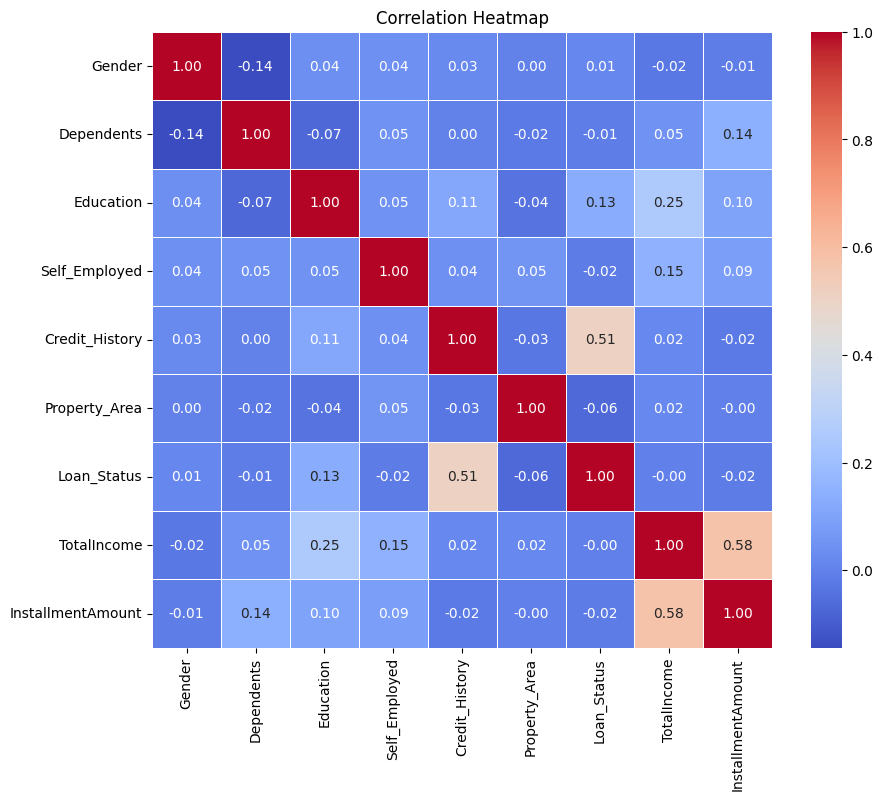

In [ ]:
# Calculate correlation
correlation = train_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = train_df.corr()

# Get the absolute correlation values of features with the target column
corr_with_target = corr_matrix['Loan_Status'].abs().sort_values()

# Select the top 5 columns with the lowest correlation with the target column
top_5_low_corr_columns = corr_with_target[:5]

# Print the top 5 columns with the lowest correlation
print("Top 5 columns with the lowest correlation with the target column (Loan_Status):\n", top_5_low_corr_columns)

Top 5 columns with the lowest correlation with the target column (Loan_Status):
 TotalIncome          0.001881
Dependents           0.010486
Gender               0.013516
InstallmentAmount    0.016158
Self_Employed        0.016316
Name: Loan_Status, dtype: float64


TotalIncome and Gender is having the lowest correlation with the target column, hence dropping this feature.

In [ ]:
train_df = train_df.drop(['Gender'], axis=1)
test_df = test_df.drop(['Gender'], axis=1)

In [ ]:
train_df = train_df.drop(['TotalIncome'], axis=1)
test_df = test_df.drop(['TotalIncome'], axis=1)

In [ ]:
test_df['Loan_Status'] = test_df['Loan_Status'].map({'Y': 1, 'N': 0})

# **4. Model**


Next, 5 different models are build and test with test set to predit result after training the model using train set.
The models are:
1. Logistic Regression
2. Naive Bayes
3. Random Forest
4. Artificial Neural Network
5. Supprt Vector Machine (SVM)

For each model, we'll follow a systematic approach:
1. Train the Model: Fit the model to the training data.
2. Test the Model: Predict the results using the test data.

3. Evaluate Performance: Calculate accuracy, and examine the confusion matrix and classification report.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   Education          614 non-null    int64  
 2   Self_Employed      614 non-null    int64  
 3   Credit_History     614 non-null    int64  
 4   Property_Area      614 non-null    int64  
 5   Loan_Status        614 non-null    int64  
 6   InstallmentAmount  614 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 33.7 KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1 to 612
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         397 non-null    int64  
 1   Education          397 non-null    int64  
 2   Self_Employed      397 non-null    int64  
 3   Credit_History     397 non-null    int64  
 4   Property_Area      397 non-null    int64  
 5   Loan_Status        397 non-null    int64  
 6   InstallmentAmount  397 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 24.8 KB


In [ ]:
X_train = train_df.drop('Loan_Status',axis = 1)
y_train = train_df['Loan_Status']

X_test = test_df.drop('Loan_Status',axis = 1)
y_test = test_df['Loan_Status']

In [ ]:
#check
import pandas as pd
pd.set_option('display.max_columns', None)  # To display all columns

# Assuming X_train is a DataFrame
nan_counts = X_train.isnull().sum()
print(nan_counts)


Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
InstallmentAmount    0
dtype: int64


## 4.1 Logistic Regression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy of Logistic Regression Model:",accuracy_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

Accuracy of Logistic Regression Model: 0.7866449511400652
[[ 88 104]
 [ 27 395]]
              precision    recall  f1-score   support

           0       0.77      0.46      0.57       192
           1       0.79      0.94      0.86       422

    accuracy                           0.79       614
   macro avg       0.78      0.70      0.72       614
weighted avg       0.78      0.79      0.77       614



## 4.2 Gaissian Naive Bayes

In [ ]:
Model_NB = GaussianNB()
Model_NB.fit(X_train,y_train)
y_pred_NB = Model_NB.predict(X_test)

accuracy_NB = accuracy_score(y_test,y_pred_NB)
print("Accuracy of Naive Bayes Model:", accuracy_NB)
print(confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))

Accuracy of Naive Bayes Model: 0.7882736156351792
[[ 88 104]
 [ 26 396]]
              precision    recall  f1-score   support

           0       0.77      0.46      0.58       192
           1       0.79      0.94      0.86       422

    accuracy                           0.79       614
   macro avg       0.78      0.70      0.72       614
weighted avg       0.79      0.79      0.77       614



## 4.3 Random Forest

In [ ]:
Model_RF = RandomForestClassifier()
Model_RF.fit(X_train, y_train)
y_pred_RF = Model_RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Random Forest Model:", accuracy_RF)
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Accuracy of Random Forest Model: 0.8680781758957655
[[140  52]
 [ 29 393]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       192
           1       0.88      0.93      0.91       422

    accuracy                           0.87       614
   macro avg       0.86      0.83      0.84       614
weighted avg       0.87      0.87      0.87       614



## 4.4 Artificial Neural Network Model

In [ ]:
# Define the model architecture
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_prob_ann = model_ann.predict(X_test)
y_pred_ann = (y_pred_prob_ann > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

# Evaluate the model on test data
loss, accuracy_AAN = model_ann.evaluate(X_test, y_test)
print("Accuracy of Artificial Neural Network Model:", accuracy_AAN)
print(confusion_matrix(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))

Epoch 1/10
10/10 [==============================] - 1s 25ms/step - loss: 0.6626 - accuracy: 0.5836 - val_loss: 0.5847 - val_accuracy: 0.7250
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5929 - accuracy: 0.7129 - val_loss: 0.5542 - val_accuracy: 0.7250
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.7129 - val_loss: 0.5272 - val_accuracy: 0.7250
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5453 - accuracy: 0.7192 - val_loss: 0.5096 - val_accuracy: 0.7625
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5272 - accuracy: 0.7539 - val_loss: 0.4884 - val_accuracy: 0.7625
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5147 - accuracy: 0.7823 - val_loss: 0.4735 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7886 - val_loss: 0.4595 - val_accuracy: 0.8000
Epoch 8/10
10/10 [=

## 4.5 Support Vector Machine

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine (SVM) Model:", accuracy_SVM)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy of Support Vector Machine (SVM) Model: 0.7866449511400652
[[ 87 105]
 [ 26 396]]
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       192
           1       0.79      0.94      0.86       422

    accuracy                           0.79       614
   macro avg       0.78      0.70      0.71       614
weighted avg       0.78      0.79      0.77       614



# **5. Assess**

##  5.1 Confusion Matrix

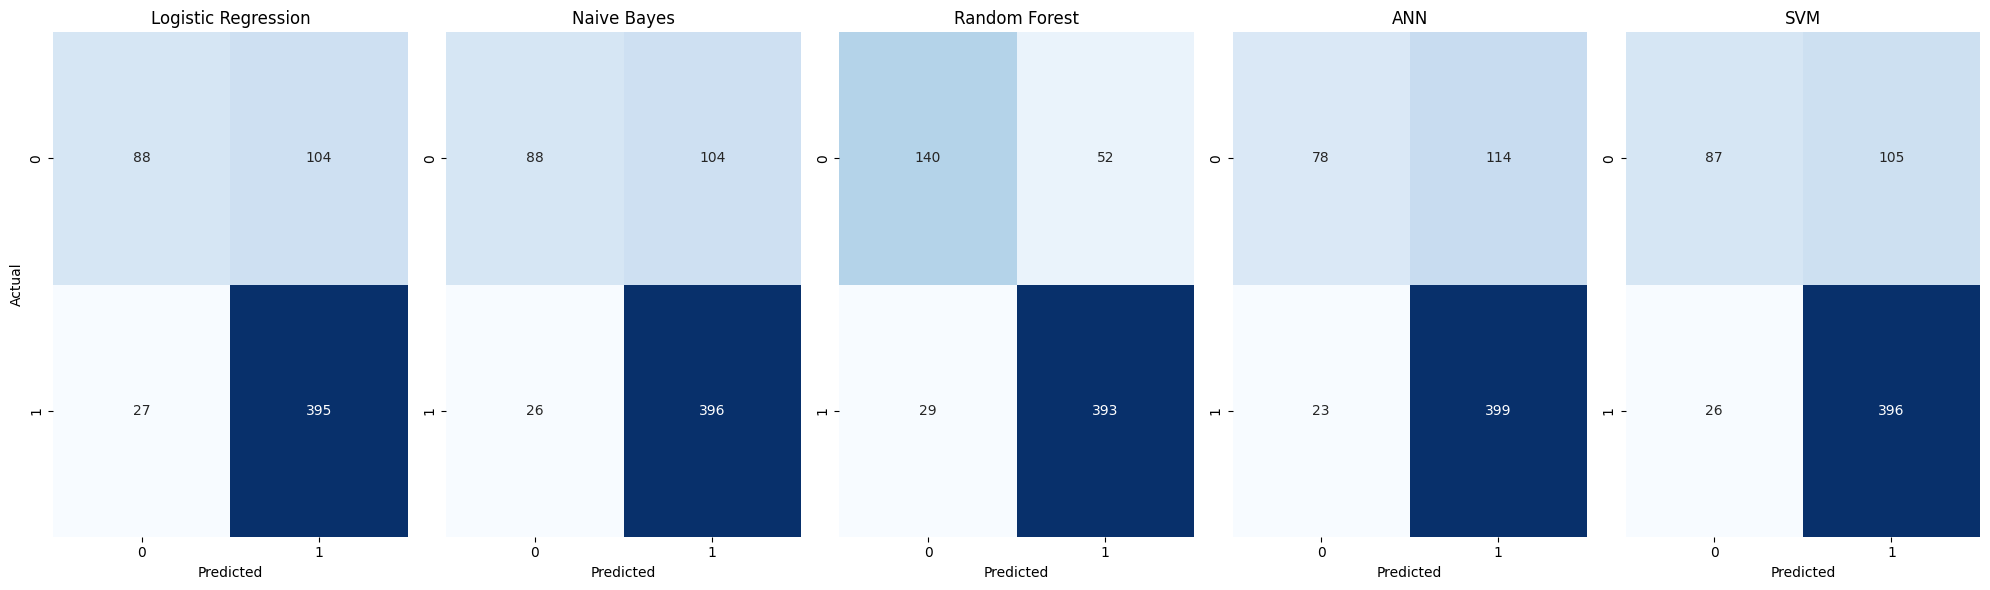

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Confusion matrix for Logistic Regression
cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Naive Bayes
cm_NB = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Naive Bayes')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')

# Confusion matrix for Random Forest
cm_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('')

# Confusion matrix for Artificial Neural Network (ANN)
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[3])
axes[3].set_title('ANN')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('')

# Confusion matrix for Support Vector Machine (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[4])
axes[4].set_title('SVM')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('')

plt.tight_layout()
plt.show()


## 5.2 Evaluation Matrix

In [ ]:
# Compute evaluation metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Artificial Neural Network', 'Support Vector Machine (SVM)'],
    'Accuracy': [accuracy_LR, accuracy_NB, accuracy_RF, accuracy_AAN, accuracy_SVM],
    'Precision': [precision_score(y_test, y_pred_LR), precision_score(y_test, y_pred_NB), precision_score(y_test, y_pred_RF), precision_score(y_test, y_pred_ann), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_LR), recall_score(y_test, y_pred_NB), recall_score(y_test, y_pred_RF), recall_score(y_test, y_pred_ann), recall_score(y_test, y_pred_svm)],
    'F1 Score': [f1_score(y_test, y_pred_LR), f1_score(y_test, y_pred_NB), f1_score(y_test, y_pred_RF), f1_score(y_test, y_pred_ann), f1_score(y_test, y_pred_svm)],
    'ROC AUC': [roc_auc_score(y_test, y_pred_LR), roc_auc_score(y_test, y_pred_NB), roc_auc_score(y_test, y_pred_RF), roc_auc_score(y_test, y_pred_ann), roc_auc_score(y_test, y_pred_svm)]
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

                          Model  Accuracy  Precision    Recall  F1 Score  \
0           Logistic Regression  0.786645   0.791583  0.936019  0.857763   
1                   Naive Bayes  0.788274   0.792000  0.938389  0.859002   
2                 Random Forest  0.868078   0.883146  0.931280  0.906574   
3     Artificial Neural Network  0.776873   0.777778  0.945498  0.853476   
4  Support Vector Machine (SVM)  0.786645   0.790419  0.938389  0.858072   

    ROC AUC  
0  0.697176  
1  0.698361  
2  0.830223  
3  0.675874  
4  0.695757  


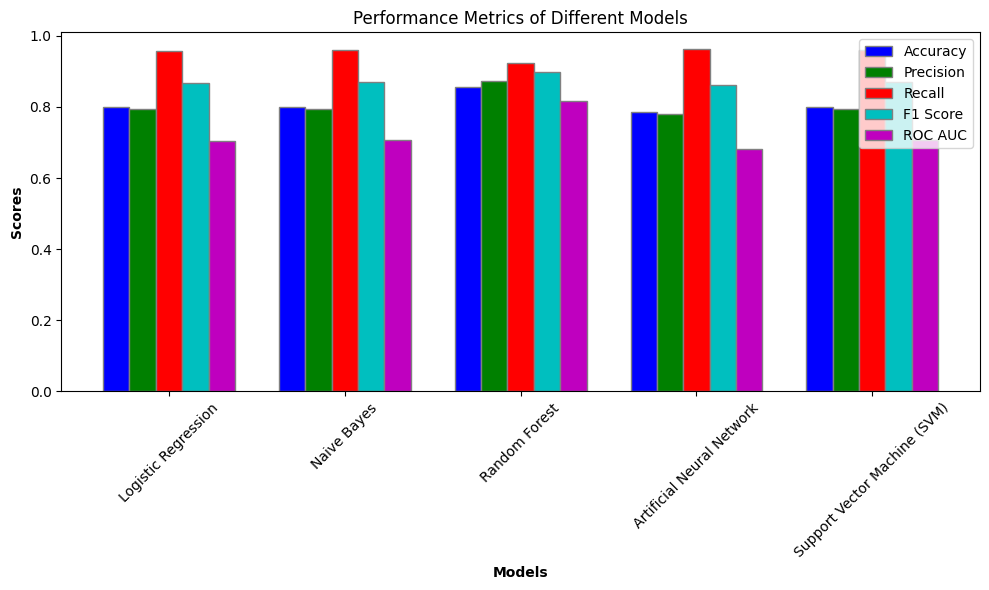

In [ ]:
# Define the models and their corresponding performance metrics
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Artificial Neural Network', 'Support Vector Machine (SVM)']
accuracy = [0.799674, 0.801303, 0.856678, 0.786645, 0.801303]
precision = [0.793713, 0.794118, 0.874439, 0.779271, 0.794118]
recall = [0.957346, 0.959716, 0.924171, 0.962085, 0.959716]
f1_score = [0.867884, 0.869099, 0.898618, 0.861082, 0.869099]
roc_auc = [0.705235, 0.706420, 0.816252, 0.681563, 0.706420 ]
# Set width of bar
bar_width = 0.15
# Set position of bar on X axis
r1 = range(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='c', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r5, roc_auc, color='m', width=bar_width, edgecolor='grey', label='ROC AUC')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*2 for r in range(len(accuracy))], models, rotation=45)
# Add ylabel
plt.ylabel('Scores', fontweight='bold')
# Create legend & Show graphic
plt.legend()
plt.title('Performance Metrics of Different Models')
plt.tight_layout()
plt.show()


Overall based on the evaluation matrix:

The Random Forest model outperforms others in terms of accuracy, precision, recall, and F1-score.

  *   has the highest accuracy (0.85) among all models, indicating that it makes the most correct predictions overall.
  *    has the highest precision (0.87), recall (0.92), and F1 score (0.89), suggesting that it strikes a good balance between precision and recall, making it suitable for imbalanced datasets.
  *   has the highest ROC AUC (0.81), indicating its ability to discriminate between true positives and false positives.

Random Forest appears to be the best-performing model for loan prediction in this comparison.

## 5.3 Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),  # Randomly sample integers from 50 to 200
    'max_depth': [None] + list(range(5, 30, 5)),  # Include None and sample from 5 to 25 with step 5
    'min_samples_split': randint(2, 11),  # Randomly sample integers from 2 to 10
    'min_samples_leaf': randint(1, 5)  # Randomly sample integers from 1 to 4
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = best_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 124}
Accuracy on Test Set: 0.7866449511400652


##5.4 Cross Validation (Random Forest)

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.85       0.7875     0.74683544 0.83544304 0.84810127]
Mean CV score: 0.8135759493670885
Standard deviation of CV scores: 0.04032648962036922


*   On average, the model achieves an accuracy of around 80.85% across different subsets of the training data.
*   The standard deviation is approximately 0.0348, suggesting relatively low variability in the model's performance

##5.5 Feature Importance Analysis

Feature ranking:
1. Feature Credit_History (0.539663)
2. Feature InstallmentAmount (0.235981)
3. Feature Property_Area (0.075311)
4. Feature Dependents (0.073648)
5. Feature Education (0.050822)
6. Feature Self_Employed (0.024575)


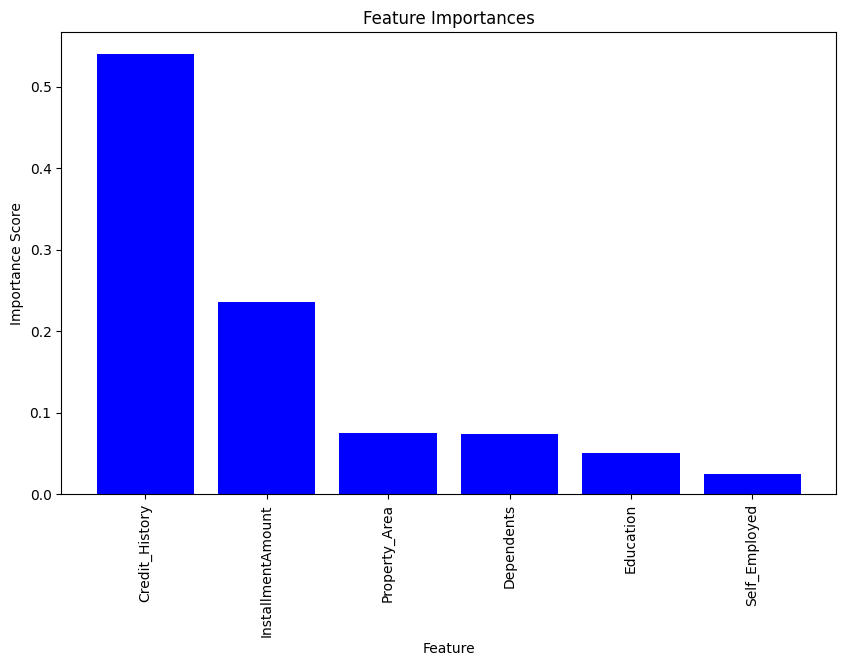

In [ ]:
# Get feature importances
importances = best_rf_model.feature_importances_
# Get the column names (feature names) exclude loan_status
feature_names = train_df.columns[:-2].tolist() +train_df.columns[-1:].tolist()
# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print("%d. Feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
# Convert indices to a list
indices_list = list(indices)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices_list], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

Credit_History (0.549542) has the highest importance score, indicating that it plays a significant role in predicting the target variable (loan status).